In [1]:
%matplotlib inline

import random

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
random.seed(1)

In [3]:
def ind_max(x):
    m = max(x)
    return x.index(m)

class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return
    
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def select_arm(self):
        if random.random() > self.epsilon:
            return ind_max(self.values)
        else:
            return random.randrange(len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [4]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [5]:
def test_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]
    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        for t in range(horizon):
            t = t + 1
            index = (sim - 1) * horizon + t - 1
            sim_nums[index] = sim
            times[index] = t
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arms[index]].draw()
            rewards[index] = reward
            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward
            algo.update(chosen_arm, reward)
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

In [6]:
def simulate_tests(means=[0.1, 0.1, 0.1, 0.1, 0.9], epsilons=[0.1, 0.2, 0.3, 0.4, 0.5], 
                   filename="ipy_standard_results.tsv",
                   num_sims= 5000, horizon=250):
    n_arms = len(means)
    random.shuffle(means)
    arms = [BernoulliArm(mu) for mu in means]
    best_arm = ind_max(means)
    print("Best arm is " + str(ind_max(means)))

    f = open(filename, "w")

    for epsilon in epsilons:
        algo = EpsilonGreedy(epsilon, [], [])
        algo.initialize(n_arms)
        results = test_algorithm(algo, arms, num_sims, horizon)
        for i in range(len(results[0])):
            f.write(str(epsilon) + "\t")
            f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
    f.close()
    
    # Read this 
    df = pd.read_csv('./ipy_standard_results.tsv', sep='\t', header=None, 
                     names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])
#     df.columns = 
    
    return df, best_arm

## Visualization

### Probability of choosing best arm over time

In [7]:
def plot_prob_best_arm(df, best_arm):
    df = df.copy()
    fig, ax = plt.subplots(figsize=(15,8))
    xseries = df[df['ChosenArm'].eq(best_arm)].groupby(['T', 'Epsilon'])['ChosenArm'].count().to_frame()
    xseries = xseries['ChosenArm'].apply(lambda x: x/5000).unstack().plot(ax=ax)
    xseries.set_ylabel(f"Probability of selecting best arm ({best_arm})")
    xseries.set_xlabel("Turn")

### Average reward over time

In [8]:
def plot_avg_reward(df):
    df = df.copy()
    fig, ax = plt.subplots(figsize=(15,8))
    xseries = df.groupby(['T', 'Epsilon'])['Reward'].mean().unstack().plot(ax=ax)
    xseries.set_ylabel("Average reward")
    xseries.set_xlabel("Turn")

### Cumulative reward over time

In [9]:
def plot_cumulative_reward(df):
    df = df.copy()
    fig, ax = plt.subplots(figsize=(15,8))
    xseries = df.groupby(['T', 'Epsilon'])['CumulativeReward'].mean().unstack().plot(ax=ax)
    xseries.set_ylabel("Cumulative reward")
    xseries.set_xlabel("Turn")

## Textbook example

In [ ]:
df, best_arm = simulate_tests()

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

## Exercises

### Only two arms

Best arm is 0


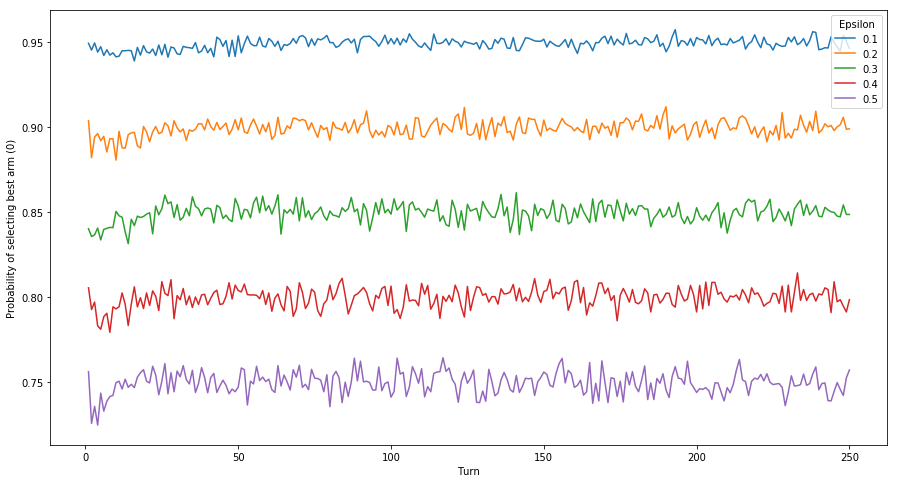

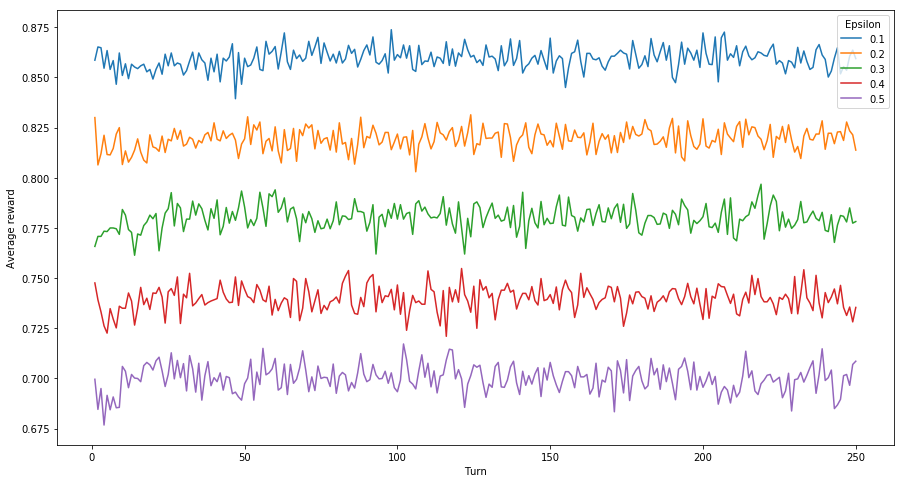

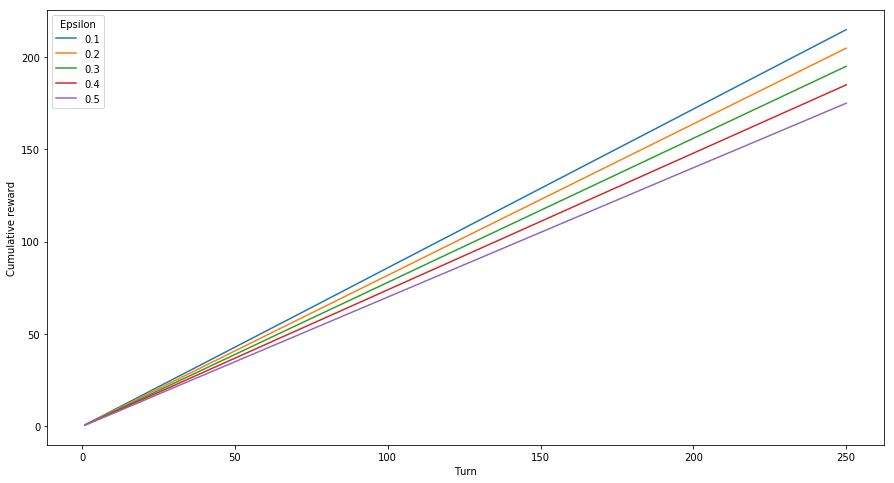

In [11]:
# With only two arms
df, best_arm = simulate_tests(means=[0.1, 0.9])

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

### 200 arms

Best arm is 170


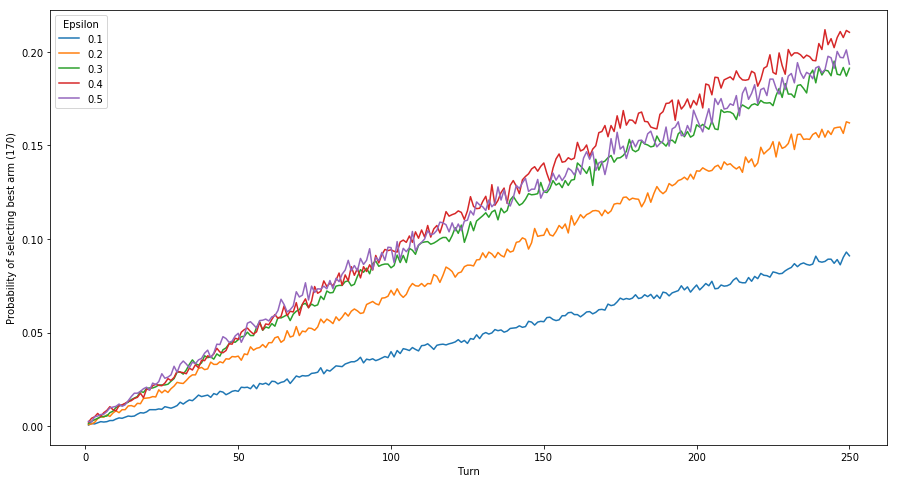

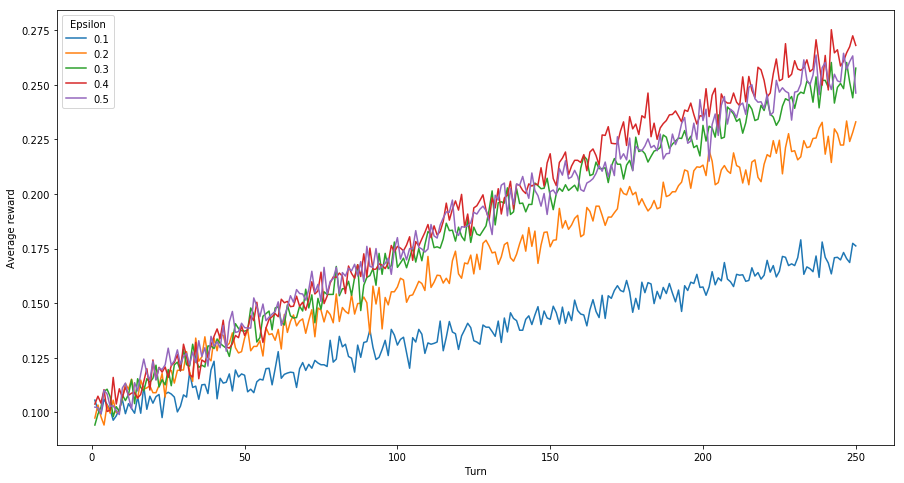

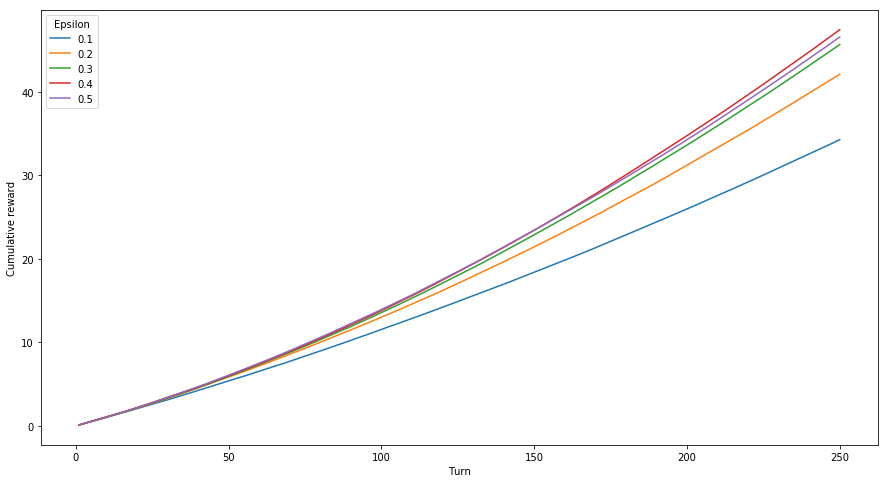

In [12]:
means = [0.1 for x in range(199)] + [0.9]
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

### 10 arms

Best arm is 2


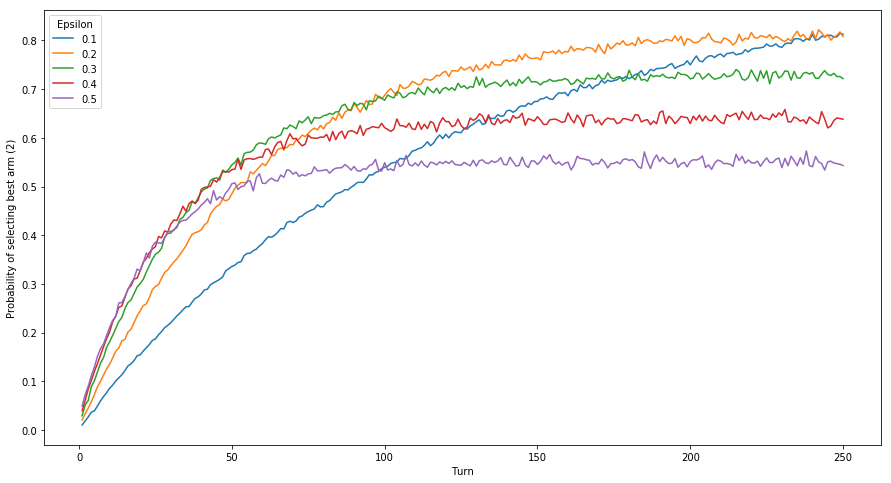

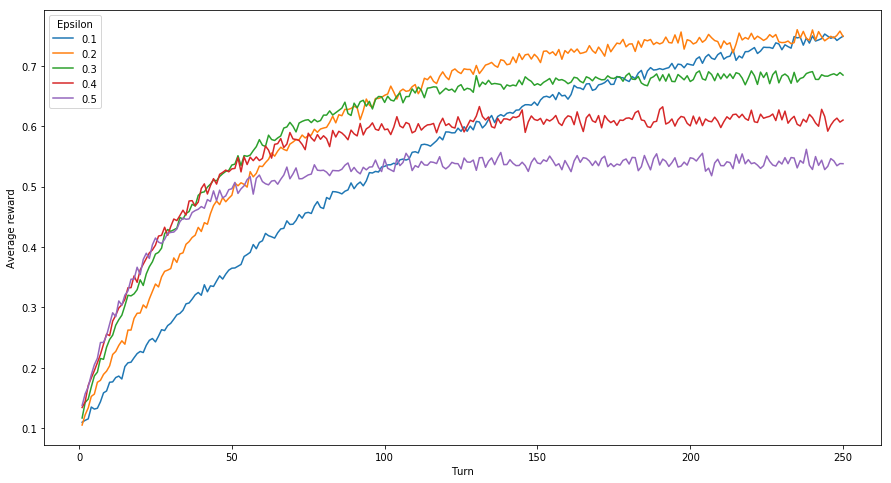

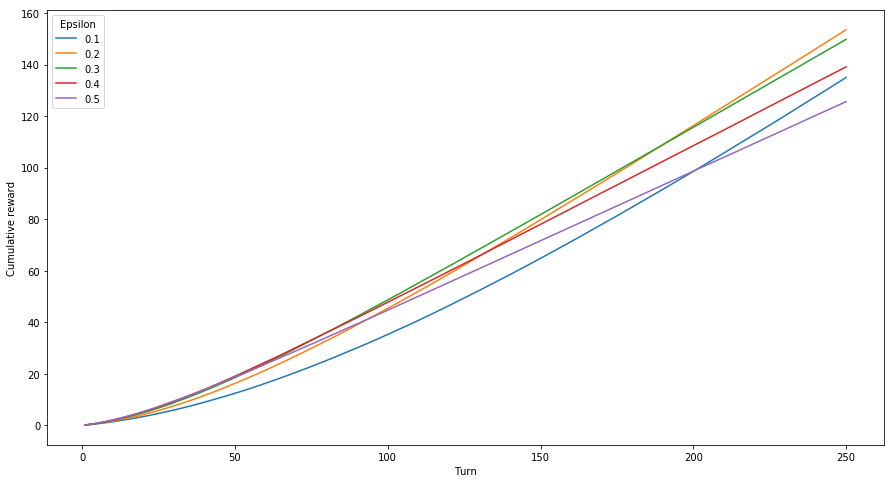

In [13]:
means = [0.1 for x in range(9)] + [0.9]
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

# When all arms have probabilities close to 0

Best arm is 3


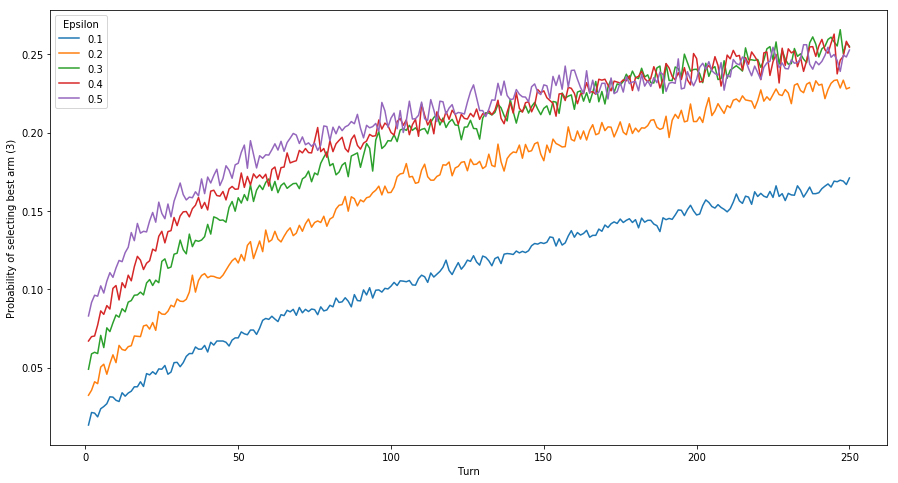

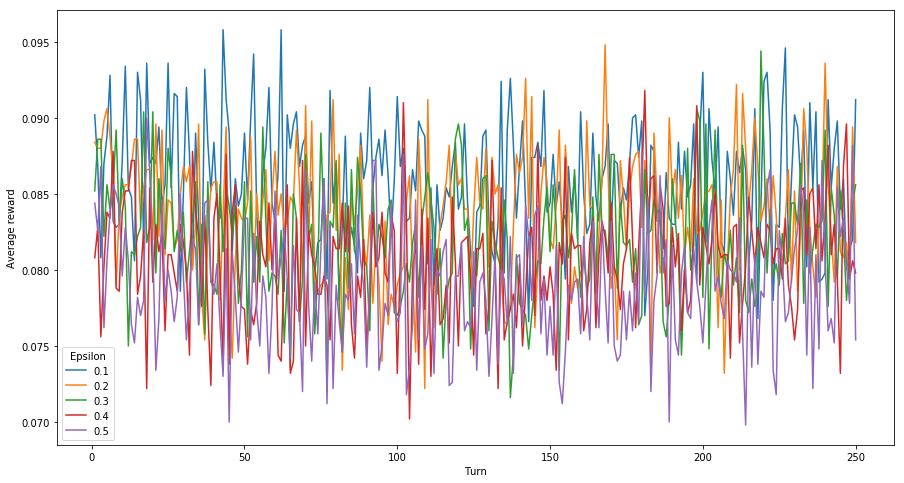

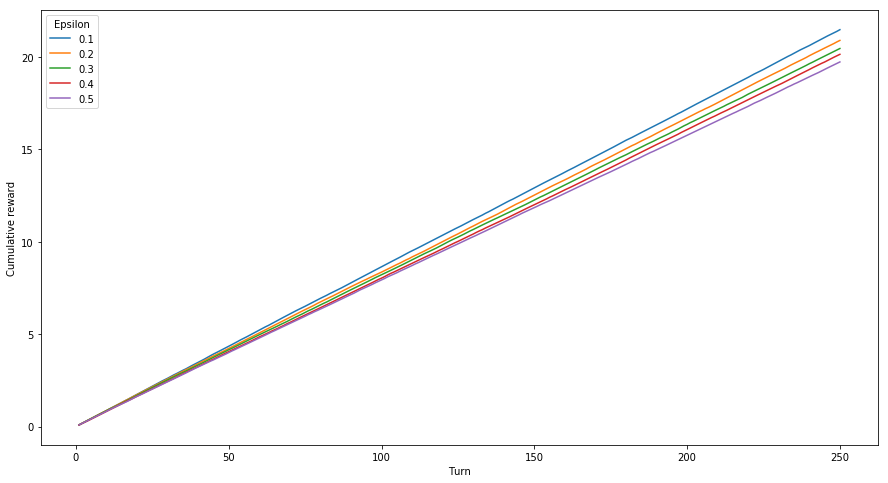

In [14]:
means = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

# When all arms have probabilities close to 1

Best arm is 4


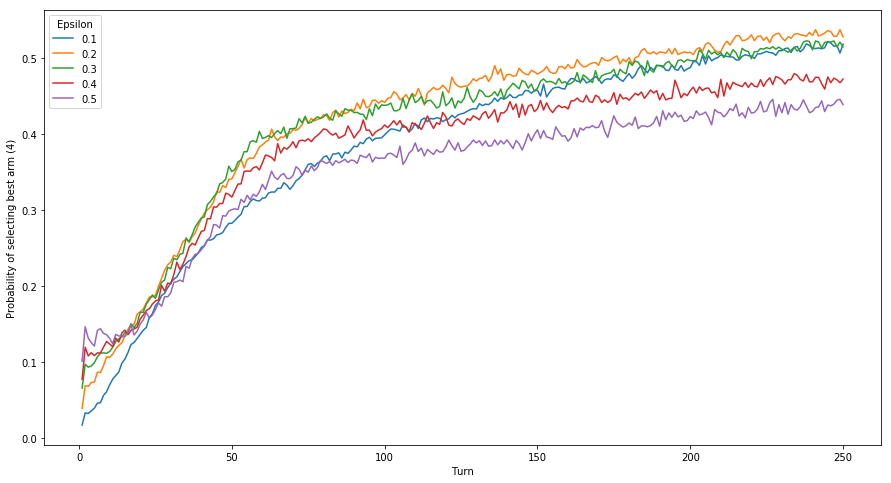

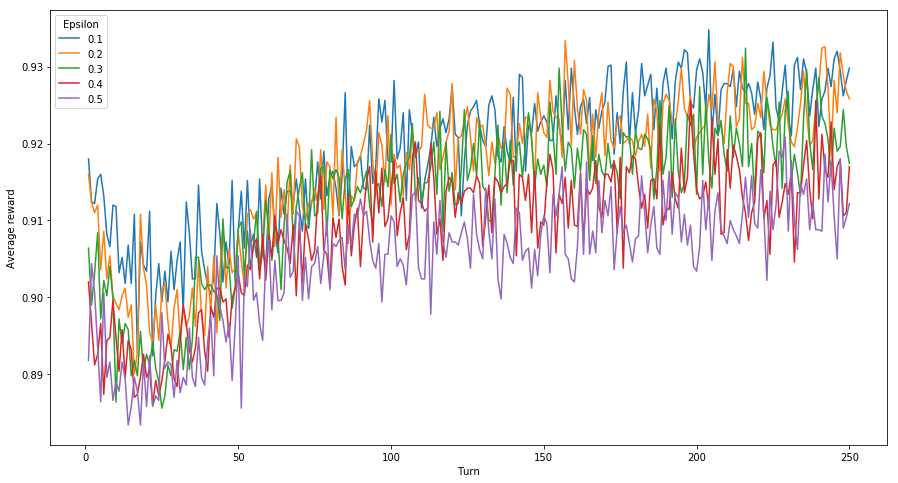

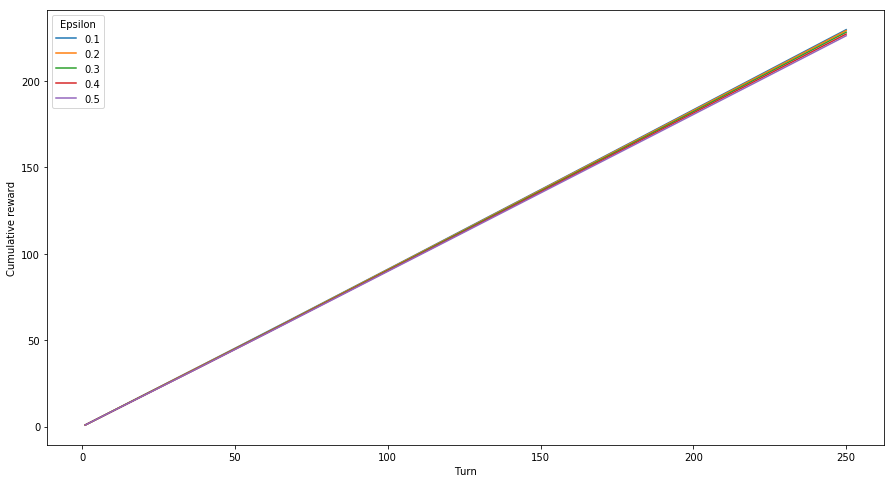

In [31]:
means = [0.8, 0.85, 0.9, 0.95, 0.92]
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

# When all arms have different probabilities

In [28]:
means = [x/10 for x in range(2,12,2)]

In [29]:
means

[0.2, 0.4, 0.6, 0.8, 1.0]

Best arm is 3


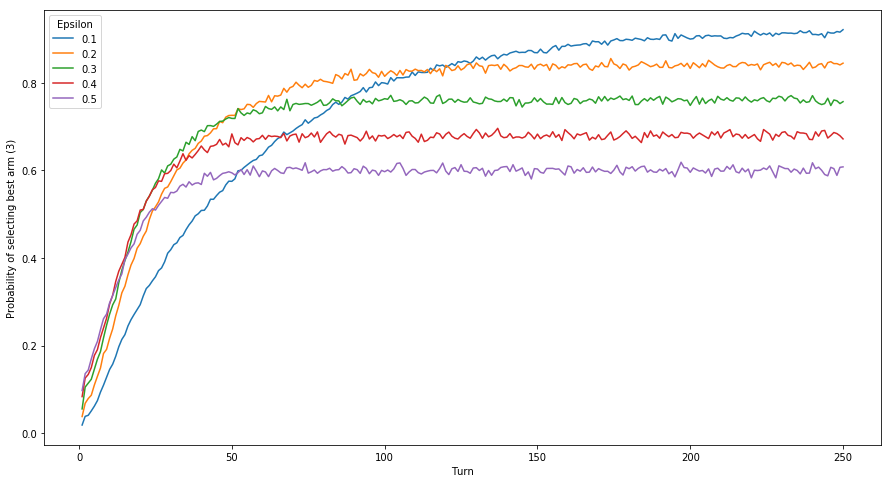

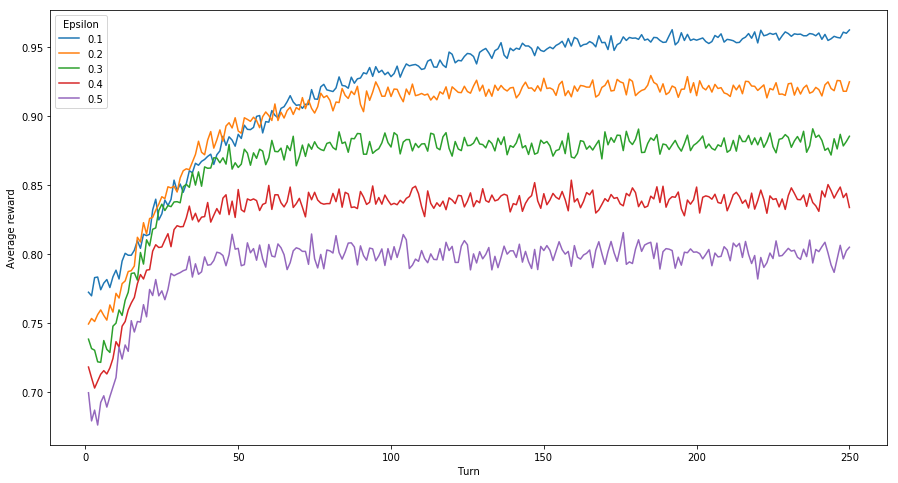

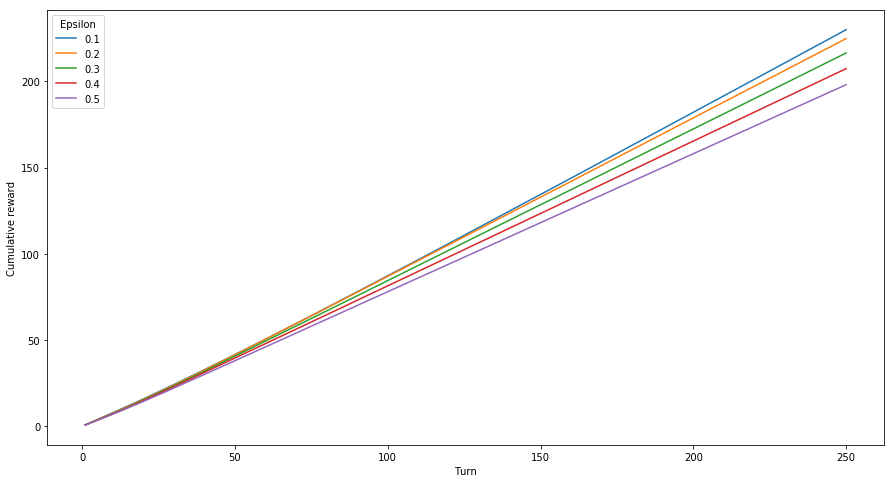

In [30]:
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

# When all arms have similar probabilities

Best arm is 3


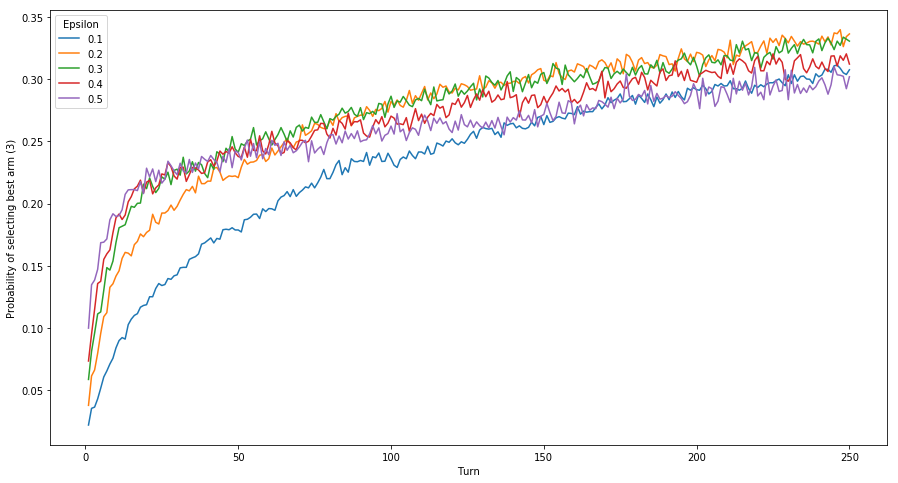

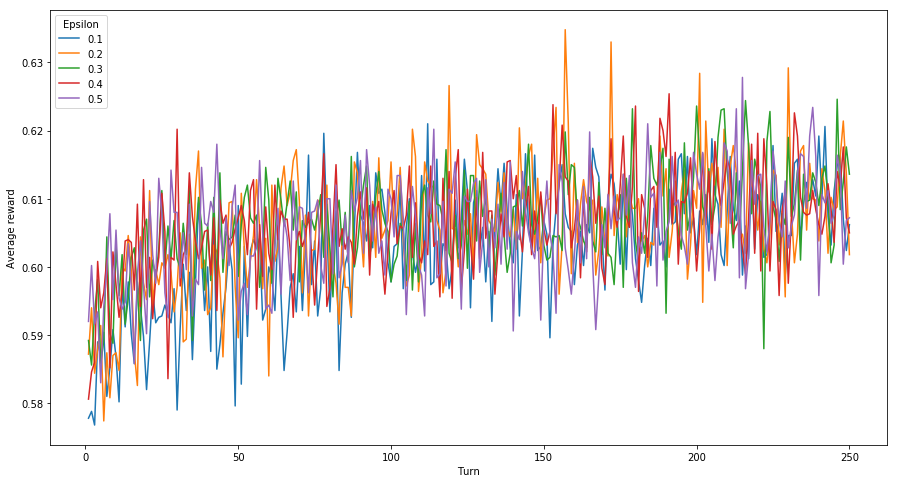

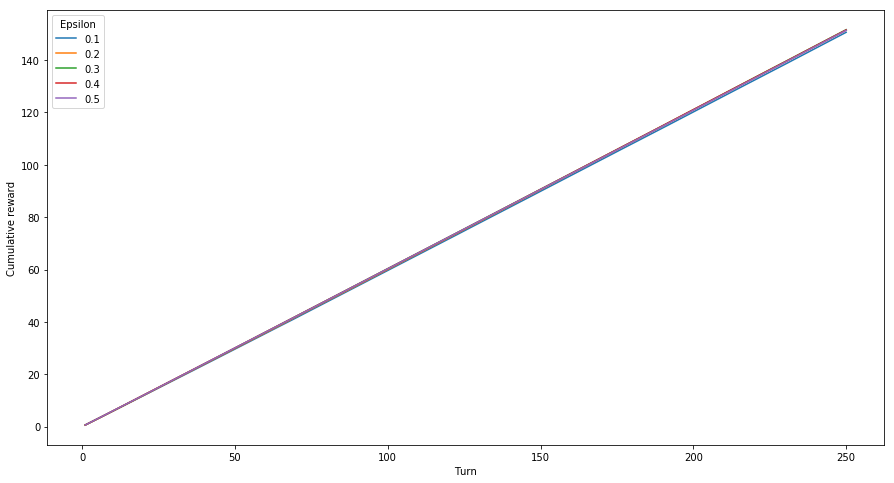

In [32]:
means = [0.56, 0.58, 0.6, 0.62, 0.64]
df, best_arm = simulate_tests(means=means)

plot_prob_best_arm(df, best_arm)
plot_avg_reward(df)
plot_cumulative_reward(df)

## Todo

Change the initialization rules for the values fields. Instead of assuming that every arm has value 0.0 (which amounts to extreme pessimism about unfamiliar arms), try assuming instead that every arm has value 1.0 at the start. How does this change the behavior of the algorithm on different problems?

Build a modified version of the epsilon-Greedy algorithm that can change the value of epsilon over time, so that epsilon is high at the start and low at the end of a simulation. This change from lots of exploration to little exploration is called an‐ nealing and will come up again in the next chapter. Implementing annealing for the epsilon-Greedy algorithm is particularly informative about the weaknesses of the standard epsilon-Greedy algorithm.
Exercises

A more involved problem you can work on is to devise an alternative test for eval‐ uting the performance of the epsilon-Greedy algorithm. In this alternative setup, you should keep track of the peformance of the algorithm only on trials when it is trying to exploit. This requires that you store more information during each sim‐ ulation than we are currently storing, but it can help you to build up an intuition for how the epsilon-Greedy algorithm behaves.